In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


In [67]:
train = pd.read_csv('train.csv', parse_dates=[1])
test = pd.read_csv('test.csv', parse_dates=[1])
df = train.copy()
df_test = test.copy()

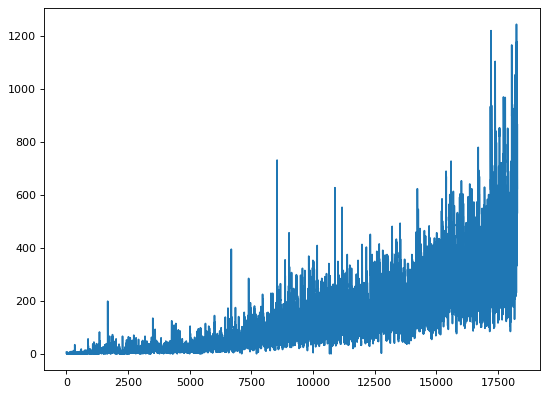

In [68]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df.Count)

In [69]:
df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [70]:
df['year'] = df.Datetime.dt.year
df['month'] = df.Datetime.dt.month
df['day'] = df.Datetime.dt.day
df['hour'] = df.Datetime.dt.hour
df['dow'] = df.Datetime.dt.dayofweek   # adding day of the week to df
df_test['year'] = df_test.Datetime.dt.year
df_test['month'] = df_test.Datetime.dt.month
df_test['day'] = df_test.Datetime.dt.day
df_test['hour'] = df_test.Datetime.dt.hour
df_test['dow'] = df_test.Datetime.dt.dayofweek


In [71]:
df.head()

,ID,Datetime,Count,year,month,day,hour,dow
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [72]:
def qrtr(x):
    if x['month'] < 4:
        return 1
    elif x['month'] >=4 and x['month'] < 7:
        return 2
    elif x['month'] >=7 and x['month'] < 10:
        return 3
    elif x['month'] >=10 and x['month'] < 13:
        return 4

In [73]:
df['qrtr'] = df.apply(qrtr, axis=1)
df_test['qrtr'] = df_test.apply(qrtr, axis=1)

In [74]:
df['year'] = df.year - 2000
df_test['year'] = df_test.year - 2000

In [75]:
df['qrtr'] = df.qrtr.astype(str)
df_test['qrtr'] = df_test.qrtr.astype(str)

In [76]:
df['yp2'] = df.year **2
df_test['yp2'] = df_test.year **2

In [77]:
df['yp2'] = np.log(df.yp2)

In [78]:
df_test['yp2'] = np.log(df_test.yp2)

In [79]:
df.head()

,ID,Datetime,Count,year,month,day,hour,dow,qrtr,yp2
0,0,2012-08-25 00:00:00,8,12,8,25,0,5,3,4.969813
1,1,2012-08-25 01:00:00,2,12,8,25,1,5,3,4.969813
2,2,2012-08-25 02:00:00,6,12,8,25,2,5,3,4.969813
3,3,2012-08-25 03:00:00,2,12,8,25,3,5,3,4.969813
4,4,2012-08-25 04:00:00,2,12,8,25,4,5,3,4.969813


In [80]:
df = pd.get_dummies(df,prefix=['qrtr'],columns=['qrtr'], drop_first=True)
df_test = pd.get_dummies(df_test,prefix=['qrtr'],columns=['qrtr'], drop_first=True)

In [81]:
df.head()

,ID,Datetime,Count,year,month,day,hour,dow,yp2,qrtr_2,qrtr_3,qrtr_4
0,0,2012-08-25 00:00:00,8,12,8,25,0,5,4.969813,0,1,0
1,1,2012-08-25 01:00:00,2,12,8,25,1,5,4.969813,0,1,0
2,2,2012-08-25 02:00:00,6,12,8,25,2,5,4.969813,0,1,0
3,3,2012-08-25 03:00:00,2,12,8,25,3,5,4.969813,0,1,0
4,4,2012-08-25 04:00:00,2,12,8,25,4,5,4.969813,0,1,0


In [82]:
X = df.drop(['ID','Datetime','Count'],axis =1)

In [83]:
y = df.Count

In [84]:
X

,year,month,day,hour,dow,yp2,qrtr_2,qrtr_3,qrtr_4
0,12,8,25,0,5,4.969813,0,1,0
1,12,8,25,1,5,4.969813,0,1,0
2,12,8,25,2,5,4.969813,0,1,0
3,12,8,25,3,5,4.969813,0,1,0
4,12,8,25,4,5,4.969813,0,1,0
...,...,...,...,...,...,...,...,...,...
18283,14,9,25,19,3,5.278115,0,1,0
18284,14,9,25,20,3,5.278115,0,1,0
18285,14,9,25,21,3,5.278115,0,1,0
18286,14,9,25,22,3,5.278115,0,1,0


In [85]:
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [86]:
import statsmodels.api as sm

In [87]:
X_ols = sm.add_constant(X)

In [88]:
model = sm.OLS(y,X_ols)

In [89]:
results = model.fit()

In [90]:
results.params

const     30331.583749
year       1746.111245
month         9.068958
day           1.160730
hour          4.476450
dow          -7.018000
yp2      -10345.332499
qrtr_2       10.993763
qrtr_3       29.187876
qrtr_4       -0.826194
dtype: float64

In [91]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     3101.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:48:39   Log-Likelihood:            -1.0953e+05
No. Observations:               18288   AIC:                         2.191e+05
Df Residuals:                   18278   BIC:                         2.191e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.033e+04    786.625     38.559      0.000    2.88e+04    3.19e+04
year        1746.1112     38.318     45.569      0.000    1671.004    1821.218
month          9.0690      0.876     10.348      0.000       7.351      10.787
day            1.1607      0.082     14.113      0.000       1.000       1.322
hour           4.4764      0.103     43.393      0.000       4.274       4.679
dow           -7.0180      0.357    -19.640      0.000      -7.718      -6.318
yp2        -1.035e+04    250.479    -41.302      0.000   -1.08e+04   -9854.370
qrtr_2        10.9938      3.339      3.292      0.001       4.448      17.539
qrtr_3        29.1879      5.661      5.156      0.000      18.092      40.284
qrtr_4        -0.8262      8.133     -0.102      0.919     -16.767      15.115
==============================================================================
Omnibus:                     7386.055   Durbin-Watson:                   0.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55049.011
Skew:                           1.763   Prob(JB):                         0.00
Kurtosis:                      10.733   Cond. No.                     3.01e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [94]:
X_train.shape , X_test.shape

((12801, 9), (5487, 9))

In [95]:
mlr = LinearRegression()

In [96]:
model_l = mlr.fit(X,y)

In [97]:
X_train.head()

,year,month,day,hour,dow,yp2,qrtr_2,qrtr_3,qrtr_4
14701,14,4,29,13,1,5.278115,1,0,0
16442,14,11,7,2,4,5.278115,0,0,1
16051,14,6,24,19,1,5.278115,1,0,0
15778,14,6,13,10,4,5.278115,1,0,0
11723,13,12,26,11,3,5.129899,0,0,1


In [98]:
y_pred = model_l.predict(X_test)

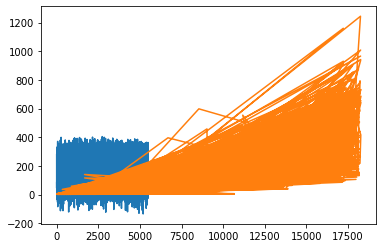

In [99]:
plt.plot(y_pred)
plt.plot(y_test)

In [100]:
r2_score(y_pred,y_test)
#r2 score with linear regression method 

0.3577059726622571